# **Writing directly in this file will erase your work!**  
# **Always make a copy before you start.**

How to copy the file

Click “File” at the top left → “Save a copy to Drive” → Rename the copied file to “filename_yourname.ipynb”

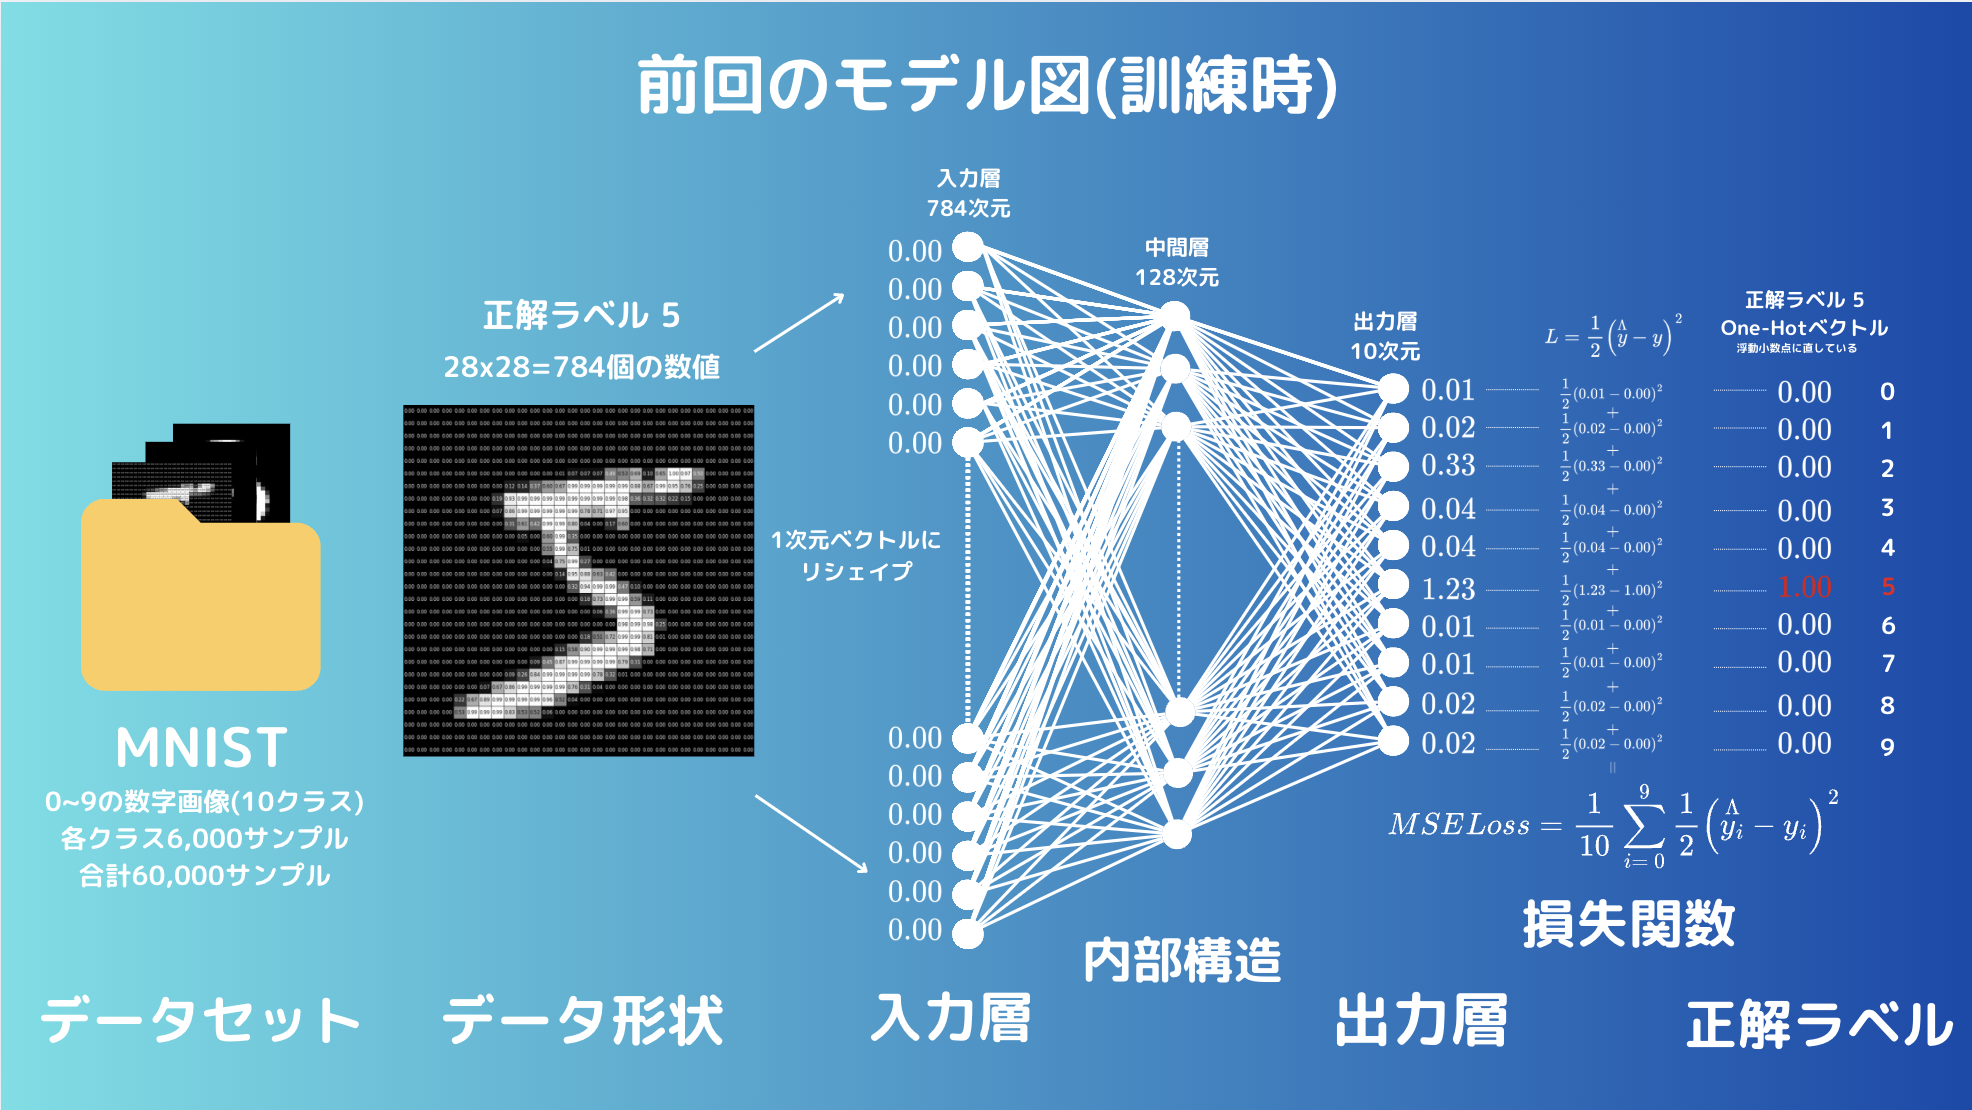

# **Discover New Species with Clustering! Spotify Music**

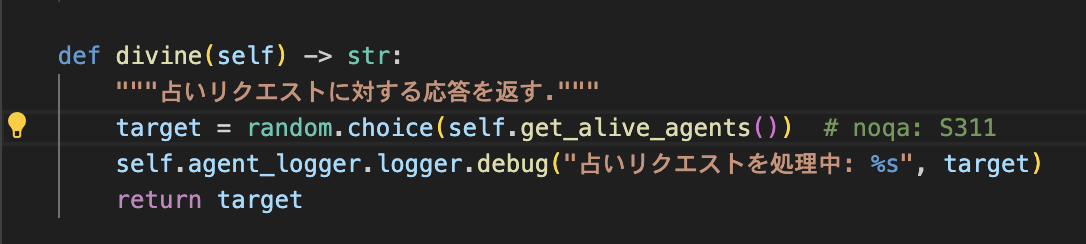

This time, using data from Spotify, a big name in music streaming,<br>
let’s cluster songs and discover new groups that don’t fit existing genres<br>
like jazz or rap.<br>

These are **unknown clusters** that we’ll find and name!<br>

In this tutorial, get ready to listen to lots of music! Here we go,

# **Music, start! 🎵**

*Note: The actual increase in music happens more in the latter half.*

# Import Required Libraries (You Can Skip This)

In [ ]:
# Import the required libraries
import kagglehub
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# Make pandas Display Settings Easier to Read (Feel Free to Skip)

In [ ]:
# Pandas display settings: Make the display easier to read
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# Step 1 Download the Data  
Check this: Are the first 5 rows of the dataset table displayed?

In [ ]:
# Step 1: Download the dataset using KaggleHub
path = kagglehub.dataset_download("tomigelo/spotify-audio-features")
print("Downloaded dataset path:", path)

# Displays a list of files in the downloaded directory
print("\nFiles in the downloaded directory:")
files = os.listdir(path)
print(files)

# Load SpotifyAudioFeaturesApril2019.csv path
csv_file = os.path.join(path, 'SpotifyAudioFeaturesApril2019.csv')
spotify_data = pd.read_csv(csv_file)

100%|██████████| 17.4M/17.4M [00:00<00:00, 106MB/s]

Extracting files...


Downloaded dataset path: /root/.cache/kagglehub/datasets/tomigelo/spotify-audio-features/versions/3

Files in the downloaded directory:
['SpotifyAudioFeaturesNov2018.csv', 'SpotifyAudioFeaturesApril2019.csv']


```python
Instance: spotify_data
Method: head
Argument: Number of rows to display (10 in this case)
```

In [ ]:
print_formatted_tensor("Key tensor", key_tensor)

"""
キーテンソルを返す

keep this number as it is: 78739483
"""


In [ ]:
# Show the first 10 lines of SpotifyAudioFeaturesApril2019.csv
spotify_data.head(10) # TODO: Instance.Method (argument)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,4,0.837,0
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,4,0.934,0
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,181838,0.348,0.000,9,0.1070,-12.569,1,0.4510,142.111,4,0.180,0
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,124016,0.472,0.847,8,0.0959,-9.008,1,0.0551,120.034,4,0.622,0
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,132742,0.731,0.910,11,0.0727,-8.932,1,0.0697,124.031,4,0.944,0


# **Step 2: Filter the Data**

In [ ]:
# Extract data by focusing on acoustic, ease of dancing, energy, liveliness, tempo, and cheerfulness.
selected_features = ['acousticness', 'danceability', 'energy', 'liveness','tempo', 'valence'] # TODO: For the corresponding six items, select the corresponding item from the table above and write it between "''
filtered_data = spotify_data[selected_features]

# Show the first 10 lines of filtered data (each line corresponds to the song)
filtered_data.head(10)

,acousticness,danceability,energy,liveness,tempo,valence
0,0.005820,0.743,0.339,0.0812,203.927,0.118
1,0.024400,0.846,0.557,0.2860,159.009,0.371
2,0.025000,0.603,0.723,0.0824,114.966,0.382
3,0.029400,0.800,0.579,0.0994,123.003,0.641
4,0.000035,0.783,0.792,0.0332,120.047,0.928
5,0.001150,0.810,0.417,0.1060,120.025,0.837
6,0.000539,0.819,0.720,0.0727,124.003,0.934
7,0.115000,0.885,0.348,0.1070,142.111,0.180
8,0.000058,0.740,0.472,0.0959,120.034,0.622
9,0.000081,0.813,0.731,0.0727,124.031,0.944


**MinMax Normalization to the Range of 0 to 1**

```python
Instance: scaler
Method: fit_transform
Argument: filtered_data
```

In [ ]:
# Normalize data to a range of 0 to 1 using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(filtered_data) # TODO: Instance.Method (argument)

# Convert normalized data to DataFrame
normalized_data = pd.DataFrame(normalized_data, columns=filtered_data.columns)

# Show the first 10 lines of filtered data (each line corresponds to the song)
normalized_data.head(10)

,acousticness,danceability,energy,liveness,tempo,valence
0,0.005843,0.745984,0.339,0.081281,0.815763,0.118
1,0.024498,0.849398,0.557,0.286286,0.636079,0.371
2,0.025100,0.605422,0.723,0.082482,0.459895,0.382
3,0.029518,0.803213,0.579,0.099499,0.492045,0.641
4,0.000035,0.786145,0.792,0.033233,0.480221,0.928
5,0.001155,0.813253,0.417,0.106106,0.480133,0.837
6,0.000541,0.822289,0.720,0.072773,0.496046,0.934
7,0.115462,0.888554,0.348,0.107107,0.568483,0.180
8,0.000059,0.742972,0.472,0.095996,0.480169,0.622
9,0.000081,0.816265,0.731,0.072773,0.496158,0.944


# **Step 3: Reduce Dimensions from 6D to 3D with PCA Transformation**

Right now, there are 6 features, so it's 6-dimensional! Can you picture 6 dimensions? No, you can't!

Let's use Principal Component Analysis (PCA) to shrink it from 6 dimensions down to 3!

```python
Class: PCA
Arguments: n_components = (number of dimensions after reduction)
```

- `PCA` (Principal Component Analysis) is a method used to reduce the number of dimensions in data.

- `n_components=3` means the data will be reduced to 3 dimensions.<br>

In [ ]:
from sklearn.decomposition import PCA

# Creating PCA instances (reduced to 3D)
pca = PCA(n_components=3) # TODO: Class name (specify the number of dimensions after reduction as argument)

```python
Instance: pca
Method: fit_transform
Argument: normalized_data (normalized data)
```

- `fit_transform()` first fits the PCA model to the data.<br>Then, it immediately transforms the data.<br>
- In this case, the original high-dimensional data shrinks down to the set 3 dimensions.<br>

In [ ]:
# Apply PCA to normalized data
pca_data = pca.fit_transform(normalized_data) # TODO: Instance.Method (argument)

In [ ]:
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Shows the first 10 lines reduced to 3D (each line corresponds to the song)
pca_df.head(10)

,PC1,PC2,PC3
0,-0.108574,-0.315119,-0.408856
1,-0.297144,-0.087688,-0.170793
2,-0.309284,-0.149071,-0.119772
3,-0.343749,0.150124,-0.216315
4,-0.545936,0.377756,-0.113401
5,-0.331742,0.320695,-0.260966
6,-0.520155,0.395119,-0.134355
7,-0.060258,-0.177307,-0.414679
8,-0.289928,0.108609,-0.250212
9,-0.527624,0.400937,-0.124871


## Explanation: PCA Component Contribution Ratios

PCA combines the original 6 items (`acousticness`, `danceability`, `energy`, `liveness`, `valence`, `tempo`) to create new axes called **principal components** (basis vectors).

---

### What are Principal Components?

- **PC1 (Principal Component 1)**: The axis that best captures the data’s spread (amount of information).  
- **PC2 (Principal Component 2)**: Orthogonal to PC1, this axis captures the second most spread in the data.  
- **PC3 (Principal Component 3)**: Orthogonal to PC1 and PC2, this axis captures the third highest spread in the data.

Each principal component is made up by mixing the original 6 items in different **ratios of contribution**.

---

### Example of Hypothetical Contribution Ratios

Here’s an example using a made-up **PC0 (principal component 0)** to show how the 6 items combine.

Let’s say the coefficients are like this:

- `acousticness`: **-0.1**  
- `danceability`: **0.6**  
- `energy`: **0.5**  
- `liveness`: **0.8**  
- `tempo`: **0.4**  
- `valence`: **0.5**

In this case, PC0 can be written as the following formula:

---

### What This Equation Means

- If a coefficient is **positive**, it means that factor boosts the principal component (PC0).  
  For example, `danceability` (0.6) and `liveness` (0.8) push PC0 higher.

- If a coefficient is **negative**, it means that factor pulls the principal component (PC0) down.  
  For example, `acousticness` (-0.1) lowers the PC0 value.

Overall, the bigger the PC0, the more upbeat and dance-worthy the song tends to be.

**📕 About PCA Components and Their Interpretation**

PCA components are new axes made by weighting and combining the original features.  
You can express how each item contributes using formulas.

<br>

You can interpret the meaning of each component based on its coefficients.  

But in reality, the meaning of components often doesn’t feel intuitive.

<br>

On the other hand, nonlinear methods like t-SNE and UMAP do not provide component coefficients.  
Compared to them, PCA is much easier to explain.

PCA Component Contributions:


,acousticness,danceability,energy,liveness,tempo,valence
PC1,0.768487,-0.223325,-0.532861,-0.055190,-0.073610,-0.259130
PC2,0.347704,0.345715,-0.052129,-0.107106,-0.000465,0.863362
PC3,0.285461,-0.471695,0.447325,0.679320,0.011798,0.185206


<Axes: title={'center': 'PCA Component Contributions'}>

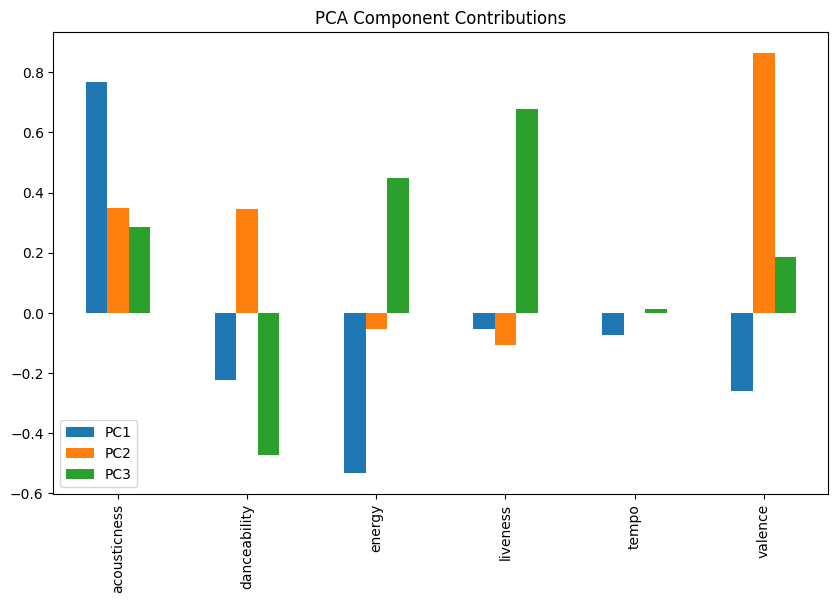

In [ ]:
# Displays the contribution rate table for PCA principal components. You can skip the code, so please analyze the table carefully.
pca_components_df = pd.DataFrame(
    pca.components_,
    columns=selected_features,
    index=['PC1', 'PC2', 'PC3']
)

print("PCA Component Contributions:")
display(pca_components_df)

# Visualize the contribution rate of PCA principal component using bar graphs
pca_components_df.T.plot(kind='bar', figsize=(10, 6), title='PCA Component Contributions')

# **Step 4: Apply Kmeans Clustering**

There’s **no solid reason behind setting the number of clusters to 7😤**.

The elbow method showed **3 clusters as optimal**,  
but that’s **way too rough**, so it was **set to 7** instead.

<br>

There’s **no absolute right answer for the number of clusters**.  
It’s best to **try out different numbers and pick what fits your goal**.

<br>

This tutorial uses **7 clusters for now**,  
but **if you get bored, try other numbers too**! 💪

In [ ]:
# Set the number of clusters
n_clusters = 7

```python
Class: KMeans
Arguments: n_clusters = (number of clusters), random_state = (random seed)
```

In [ ]:
# Creating an instance of the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42) # TODO: Class (argument)

In [ ]:
# Extract only the feature amounts used for clustering from PCA data
pca_features = pca_df[['PC1', 'PC2', 'PC3']]
pca_features

,PC1,PC2,PC3
0,-0.108574,-0.315119,-0.408856
1,-0.297144,-0.087688,-0.170793
2,-0.309284,-0.149071,-0.119772
3,-0.343749,0.150124,-0.216315
4,-0.545936,0.377756,-0.113401
...,...,...,...
130658,-0.346016,-0.242305,-0.094264
130659,0.695092,0.079160,0.032785
130660,-0.053562,0.146590,-0.127664
130661,-0.171630,-0.355117,-0.323467


```python
Instance: kmeans
Method: fit_predict
Argument: pca_features (data for clustering)
```

- The `fit_predict()` method applies KMeans to the data.  
  It does both:  
  - **fit (training)** and  
  - **predict (assigning cluster labels)**  
  at the same time.  
- It returns an array with the **cluster number assigned to each sample**.


The Key tensor is created by simply cloning the normalized embedding tensor.

So,  
$key_{i}$ is the normalized embedding vector for the i-th string.

Now, let's move on to calculating the AttentionOutput.

$$
{AttentionOutput}(Q, K, V)
\;=\;
{Dropout}\Bigl(
  {Softmax}\Bigl(
    \frac{QK^{T}}{\sqrt{d_{k}}}
    \;+\;
    {mask}
  \Bigr)
\Bigr)\;V
$$

<br>
<br>

First, calculate AttentionWeights using Query and Key.

$$
{AttentionWeights}=\frac{Q\,K^T}{\sqrt{d_k}}
$$

Here are the steps:

1. Transpose the Key tensor  
2. Divide by the square root of the embedding dimension, $\sqrt{d_k}$  
3. Take the dot product with the Query tensor from the left

```python
import torch
data = torch.tensor(list_of_IDs, dtype=torch.long)
```

* Import the PyTorch library `torch`.
* Create a tensor (the structure PyTorch uses for number data) from `list_of_IDs` using the integer type `long`.

In [ ]:
# Apply KMeans clustering to predict cluster labels
cluster_labels = kmeans.fit_predict(pca_features) # TODO: Apply instance. Method (object data)
cluster_labels

array([4, 4, 4, ..., 1, 4, 1], dtype=int32)

In [ ]:
# Add KmeansClustering result (cluster number) to pca_df's 'Cluster' column
pca_df['Cluster'] = cluster_labels
pca_df['Cluster']

,Cluster
0,4
1,4
2,4
3,3
4,3
...,...
130658,4
130659,2
130660,1
130661,4


In [ ]:
# View the entire pca_df
pca_df

,PC1,PC2,PC3,Cluster
0,-0.108574,-0.315119,-0.408856,4
1,-0.297144,-0.087688,-0.170793,4
2,-0.309284,-0.149071,-0.119772,4
3,-0.343749,0.150124,-0.216315,3
4,-0.545936,0.377756,-0.113401,3
...,...,...,...,...
130658,-0.346016,-0.242305,-0.094264,4
130659,0.695092,0.079160,0.032785,2
130660,-0.053562,0.146590,-0.127664,1
130661,-0.171630,-0.355117,-0.323467,4


# **Step 5: Add Spotify Links to PCA Results (Optional to Skip)**

In [ ]:
# Step 5: Add Metadata to PCA Results
pca_df['track_id'] = spotify_data['track_id']
pca_df['spotify_link'] = "https://open.spotify.com/track/" + pca_df['track_id']

display(pca_df.head())

,PC1,PC2,PC3,Cluster,track_id,spotify_link
0,-0.108574,-0.315119,-0.408856,4,2RM4jf1Xa9zPgMGRDiht8O,https://open.spotify.com/track/2RM4jf1Xa9zPgMG...
1,-0.297144,-0.087688,-0.170793,4,1tHDG53xJNGsItRA3vfVgs,https://open.spotify.com/track/1tHDG53xJNGsItR...
2,-0.309284,-0.149071,-0.119772,4,6Wosx2euFPMT14UXiWudMy,https://open.spotify.com/track/6Wosx2euFPMT14U...
3,-0.343749,0.150124,-0.216315,3,3J2Jpw61sO7l6Hc7qdYV91,https://open.spotify.com/track/3J2Jpw61sO7l6Hc...
4,-0.545936,0.377756,-0.113401,3,2jbYvQCyPgX3CdmAzeVeuS,https://open.spotify.com/track/2jbYvQCyPgX3Cdm...


# **Step 6: Visualize Clustering Results in 3D Space**

In [ ]:
# Step 6: Visualize clustering results in 3D space
fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3', color='Cluster',
    title=f'3D Visualization of Clusters with {n_clusters} Clusters',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    color_discrete_sequence=px.colors.qualitative.Vivid
)
fig.update_traces(marker=dict(size=1, opacity=0.8))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Click and drag the 3D plot to move it around. Looking from each axis, you can see that PC1 has the largest variance.

PCA is a method that picks axes (principal components) in order from the direction where **data variance is the largest**.

In other words...

- **PC1** (the 1st principal component) is the direction where **data variance is the largest**  
- **PC2** (the 2nd principal component) is the direction next largest in variance, but **orthogonal to PC1**  
- **PC3** (the 3rd principal component) is the direction next largest in variance, but **orthogonal to both PC1 and PC2**

Since the principal components are taken in order from directions with the biggest variance,  
the relationship **PC1 variance ≥ PC2 variance ≥ PC3 variance** always holds!

# **Step 7: DJ Time🎵**<br>

Twenty songs were randomly picked from each cluster and visualized with Plotly.<br>
Click the dots to jam out to the tracks!

(Please log in to Spotify with your Google account)

<br>

⚠️ Sometimes, a song may be too old to play! If that happens, try another track!

**Songs close to each other are similar,**<br>
**while songs far apart are different.**<br>
Try guessing the genre too!

In [ ]:
# Step 8: Create a lightweight visualization using random samples in Plotly. You can skip the code.
random_samples=20 # Specify the number of samples
sampled_df = pca_df.groupby('Cluster').apply(lambda x: x.sample(n=min(random_samples, len(x)), random_state=42)).reset_index(drop=True)

fig = go.Figure()
for cluster, cluster_data in sampled_df.groupby('Cluster'):
    fig.add_trace(go.Scatter3d(
        x=cluster_data['PC1'],
        y=cluster_data['PC2'],
        z=cluster_data['PC3'],
        mode='markers',
        marker=dict(size=2),
        name=f'Cluster {cluster}',
        customdata=cluster_data['spotify_link'],
        hovertemplate="<a href='%{customdata}' target='_blank' style='color:white;'>Listen</a><extra></extra>",
        hoverinfo='text'
    ))

fig.update_layout(
    title=f'3D Visualization with Limited Points ({n_clusters} Clusters)',
    scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'),
    showlegend=True
)
fig.show()

<ipython-input-19-adab5e8b8e1f>:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



No earphones needed! Feel free to crank up the sound!

# Step 8 (There’s an Issue)

Listen carefully and try to guess the genre of each cluster. If you find a cluster with no clear genre, give it your own creative name.<br>

Don’t be shy—keep listening as much as you like!

### **Note: The cluster order depends on the random nature of k-means, so it may differ from person to person.<br> For example, your Cluster 0 might be Rock, but someone else’s could be Classical. Don’t sweat it!<br>**

The songs are forcefully divided into seven genres. So even if you call one Rock, it’s only “kind of” Rock at best.<br>

Try not to fuss too much over this. If you want more precision, increase the number of clusters and try again!

In [ ]:
# Write the genre of the song for each cluster. Those that do not have a genre are named as new species.
# Genres you already know: Rock, classical, ethnic, ballad, pop style Western music

'''
Cluster0: 例 ロック
Cluster1:
Cluster2:
Cluster3:
Cluster4:
Cluster5:
Cluster6:
'''
